#***Lab 5 Tasks***

##**Importing Libraries and Reading Data**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder,FunctionTransformer
from sklearn.pipeline import Pipeline

In [ ]:
df = pd.read_csv("/content/heart_2022_with_nans.csv")

##**Data Understanding**

In [ ]:
df.shape

(445132, 40)

In [ ]:
df.tail()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
445127,Virgin Islands,Female,Good,0.0,3.0,Within past 2 years (1 year but less than 2 ye...,Yes,6.0,None of them,No,No,No,Yes,No,No,Yes,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Yes,"Black only, Non-Hispanic",Age 18 to 24,1.65,69.85,25.63,NaN,Yes,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
445128,Virgin Islands,Female,Excellent,2.0,2.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"Black only, Non-Hispanic",Age 50 to 54,1.70,83.01,28.66,No,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
445129,Virgin Islands,Female,Poor,30.0,30.0,5 or more years ago,No,5.0,1 to 5,No,No,No,No,No,No,No,No,No,No,No,No,NaN,No,No,No,Current smoker - now smokes every day,Use them some days,NaN,NaN,Age 65 to 69,1.70,49.90,17.23,NaN,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
445130,Virgin Islands,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,5.0,None of them,Yes,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Yes,"Black only, Non-Hispanic",Age 70 to 74,1.83,108.86,32.55,No,Yes,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
445131,Virgin Islands,Male,Very good,0.0,1.0,NaN,Yes,5.0,None of them,No,No,No,No,No,No,No,No,No,No,No,No,Yes,Yes,No,No,Former smoker,Not at all (right now),Yes,"Black only, Non-Hispanic",Age 40 to 44,1.68,63.50,22.60,Yes,No,No,No,"Yes, received tetanus shot but not sure what type",No,No


In [ ]:
df.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,434205.000000,436065.000000,439679.000000,416480.000000,403054.000000,396326.000000
mean,4.347919,4.382649,7.022983,1.702691,83.074470,28.529842
std,8.688912,8.387475,1.502425,0.107177,21.448173,6.554889
min,0.000000,0.000000,1.000000,0.910000,22.680000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.130000
50%,0.000000,0.000000,7.000000,1.700000,80.740000,27.440000
75%,3.000000,5.000000,8.000000,1.780000,95.250000,31.750000
max,30.000000,30.000000,24.000000,2.410000,292.570000,99.640000


In [ ]:
df.nunique()

,0
State,54
Sex,2
GeneralHealth,5
PhysicalHealthDays,31
MentalHealthDays,31
LastCheckupTime,4
PhysicalActivities,2
SleepHours,24
RemovedTeeth,4
HadHeartAttack,2


In [ ]:
df.isnull().sum()

,0
State,0
Sex,0
GeneralHealth,1198
PhysicalHealthDays,10927
MentalHealthDays,9067
LastCheckupTime,8308
PhysicalActivities,1093
SleepHours,5453
RemovedTeeth,11360
HadHeartAttack,3065


###**Dropping duplicate values**

In [ ]:
#df.loc[df.duplicated()] = 366 rows
df.drop_duplicates(subset=None, keep='first', inplace=True)
# keep = first to keep the first occurrence of data
# 445132
df

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,Never smoked,Not at all (right now),No,"White only, Non-Hispanic",Age 80 or older,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 55 to 59,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,No,No,Yes,No,No,No,No,Yes,No,No,No,No,No,No,No,Current smoker - now smokes some days,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",NaN,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 40 to 44,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,Virgin Islands,Female,Good,0.0,3.0,Within past 2 years (1 year but less than 2 ye...,Yes,6.0,None of them,No,No,No,Yes,No,No,Yes,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Yes,"Black only, Non-Hispanic",Age 18 to 24,1.65,69.85,25.63,NaN,Yes,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
445128,Virgin Islands,Female,Excellent,2.0,2.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"Black only, Non-Hispanic",Age 50 to 54,1.70,83.01,28.66,No,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
445129,Virgin Islands,Female,Poor,30.0,30.0,5 or more years ago,No,5.0,1 to 5,No,No,No,No,No,No,No,No,No,No,No,No,NaN,No,No,No,Current smoker - now smokes every day,Use them some days,NaN,NaN,Age 65 to 69,1.70,49.90,17.23,NaN,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
445130,Virgin Islands,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,5.0,None of them,Yes,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Yes,"Black only, Non-Hispanic",Age 70 to 74,1.83,108.86,32.55,No,Yes,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes


###**Checking for outliers in data for chosing data imputation technique**

In [ ]:
numerical_features = df.select_dtypes(include=['number']).columns
categorical_features=df.select_dtypes(include=['object']).columns
numerical_features

Index(['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours',
       'HeightInMeters', 'WeightInKilograms', 'BMI'],
      dtype='object')

<Axes: ylabel='PhysicalHealthDays'>

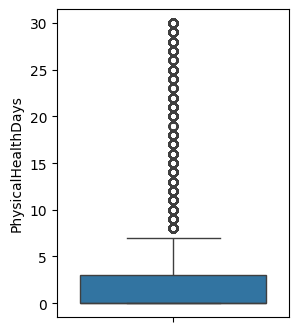

In [ ]:
plt.figure(figsize=(3,4))
sns.boxplot(y='PhysicalHealthDays', data=df)

<Axes: ylabel='MentalHealthDays'>

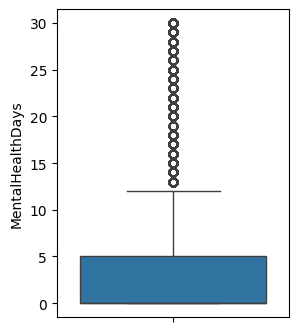

In [ ]:
plt.figure(figsize=(3,4))
sns.boxplot(y='MentalHealthDays', data=df)

<Axes: ylabel='SleepHours'>

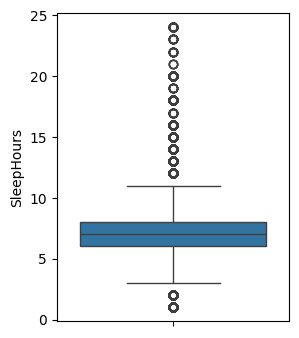

In [ ]:
plt.figure(figsize=(3,4))
sns.boxplot(y='SleepHours', data=df)

<Axes: ylabel='HeightInMeters'>

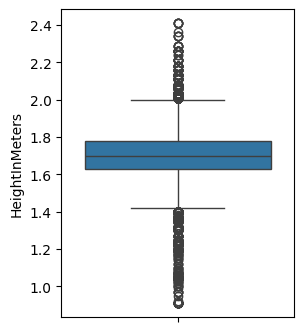

In [ ]:
plt.figure(figsize=(3,4))
sns.boxplot(y='HeightInMeters', data=df)

<Axes: ylabel='WeightInKilograms'>

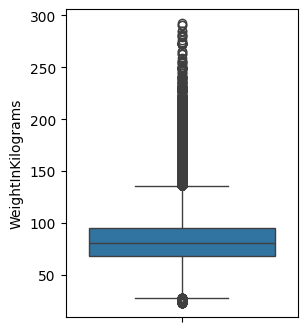

In [ ]:
plt.figure(figsize=(3,4))
sns.boxplot(y='WeightInKilograms', data=df)

<Axes: ylabel='BMI'>

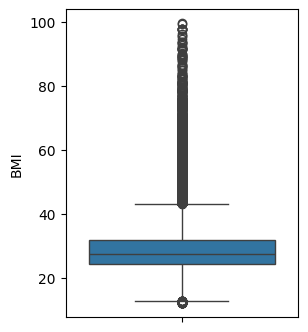

In [ ]:
plt.figure(figsize=(3,4))
sns.boxplot(y='BMI', data=df)

##**Imputation/Handling missing values**
###Using **median** for **numerical** features and **mode** for **categorical**
#### outliers are present in numerical data

In [ ]:
categorical_imputer = SimpleImputer(strategy='most_frequent')
numerical_transformer = SimpleImputer(strategy='median')

df[numerical_features] = numerical_transformer.fit_transform(df[numerical_features])
df[categorical_features] = categorical_imputer.fit_transform(df[categorical_features])

In [ ]:
df.isnull().sum()

,0
State,0
Sex,0
GeneralHealth,0
PhysicalHealthDays,0
MentalHealthDays,0
LastCheckupTime,0
PhysicalActivities,0
SleepHours,0
RemovedTeeth,0
HadHeartAttack,0


###**Univariate analysis of categorical variables**

In [ ]:
df.CovidPos = df.CovidPos.replace({'Tested positive using home test without a health professional': "Positive via home test"})

<ipython-input-119-94d680142290>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['CovidPos'],palette='bright')


<Axes: xlabel='CovidPos', ylabel='count'>

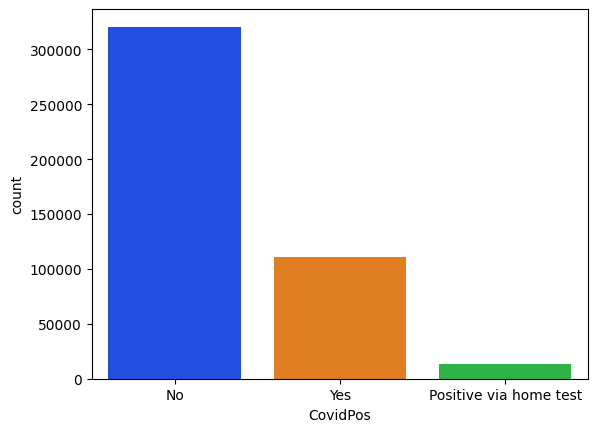

In [ ]:
sns.countplot(x=df['CovidPos'],palette='bright')
# there are more people who are not having covid

In [ ]:
df.HadDiabetes = df.HadDiabetes.replace({'No, pre-diabetes or borderline diabetes': "No (Pre/borderline)"})
df.HadDiabetes = df.HadDiabetes.replace({'Yes, but only during pregnancy (female)': "Yes(pregnancy)"})

<ipython-input-121-e005ce086bba>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df.HadDiabetes,palette='turbo',dodge=False)


<Axes: xlabel='HadDiabetes', ylabel='count'>

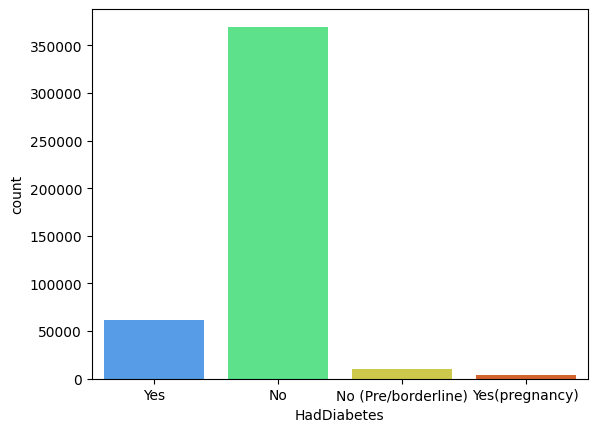

In [ ]:
sns.countplot(x=df.HadDiabetes,palette='turbo',dodge=False)

<Axes: ylabel='count'>

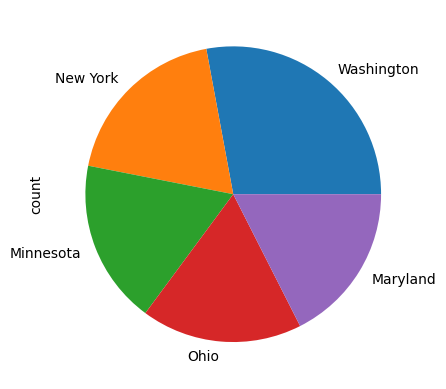

In [ ]:
df.State.value_counts(ascending=False).head().plot(kind='pie')

<Axes: xlabel='BMI', ylabel='Count'>

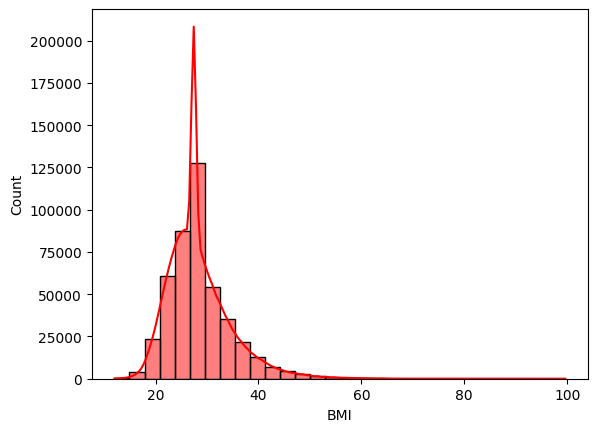

In [ ]:
sns.histplot(x=df.BMI, color='red', kde=True, bins=30)
# data is right skewwed

<Axes: ylabel='count'>

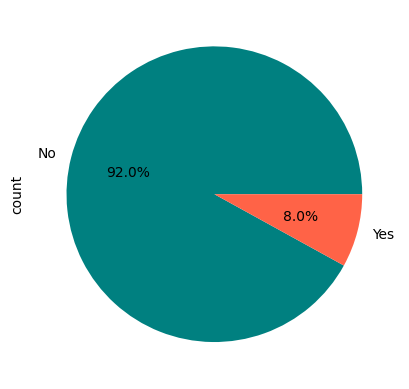

In [ ]:
colors = ['#008080','#FF6347']
df.HadCOPD.value_counts().plot(kind='pie',autopct='%0.1f%%',colors=colors)
# only 8 % are having COPD

<Axes: xlabel='SleepHours', ylabel='Count'>

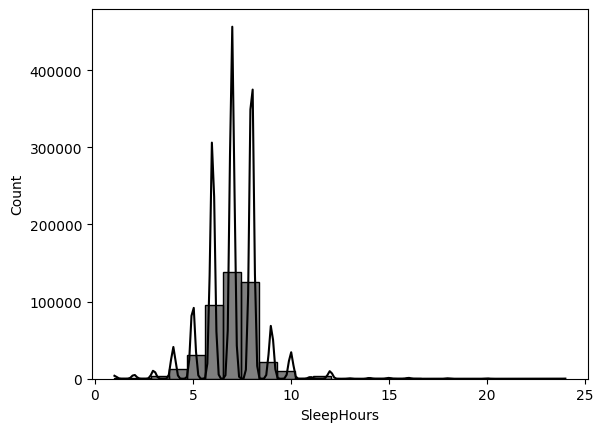

In [ ]:
sns.histplot(x=df.SleepHours, color='black', kde=True, bins=25)
# more people are having sleep of 6-8 hours

<Axes: ylabel='count'>

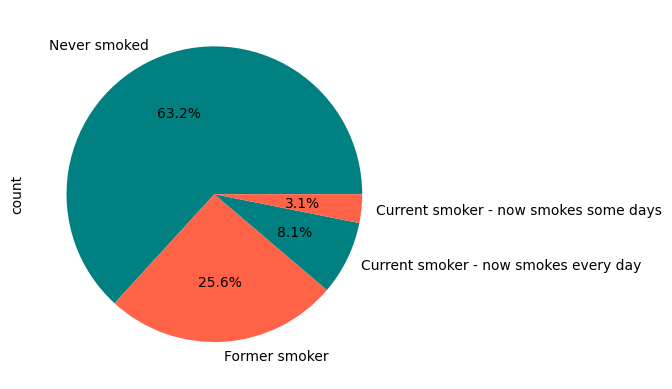

In [ ]:
df.SmokerStatus.value_counts().plot(kind='pie',autopct='%0.1f%%',colors=colors)

###**Bivariate Analysis**

<Axes: xlabel='Sex', ylabel='count'>

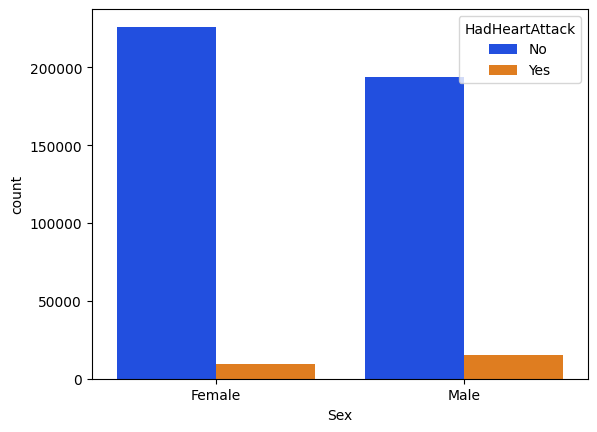

In [ ]:
sns.countplot(x=df['Sex'],hue = df.HadHeartAttack ,palette='bright')
# More male had heart attack

<Axes: xlabel='AlcoholDrinkers', ylabel='count'>

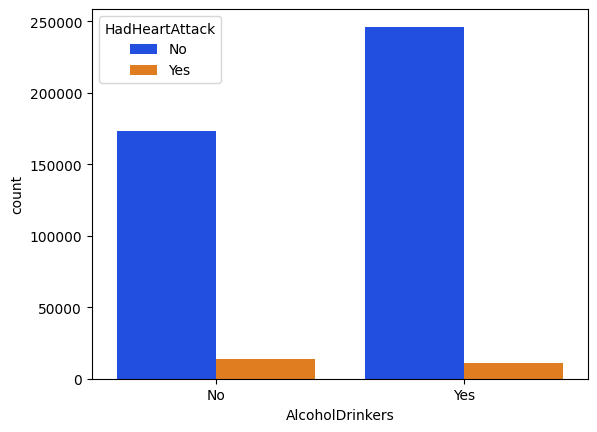

In [ ]:
sns.countplot(x=df.AlcoholDrinkers,hue = df.HadHeartAttack ,palette='bright')
# There are more people who are alcoholic but are not having heart attack

<Axes: xlabel='HadArthritis', ylabel='count'>

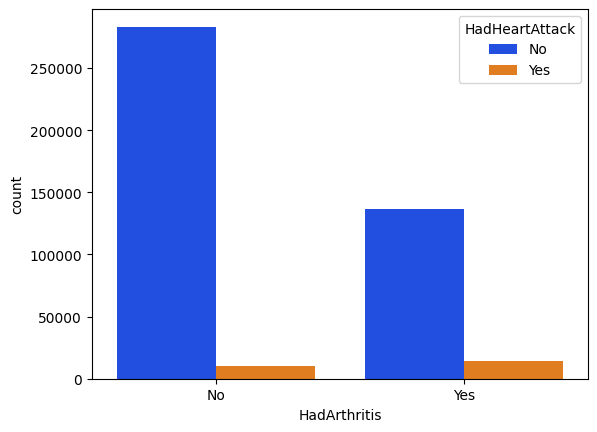

In [ ]:
sns.countplot(x=df.HadArthritis,hue = df.HadHeartAttack ,palette='bright')

<Axes: xlabel='HadHeartAttack', ylabel='count'>

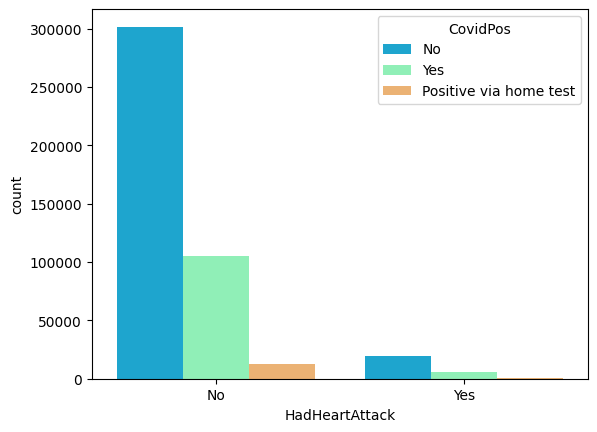

In [ ]:
sns.countplot(x=df.HadHeartAttack,hue = df.CovidPos ,palette='rainbow')

<Axes: xlabel='count', ylabel='AgeCategory'>

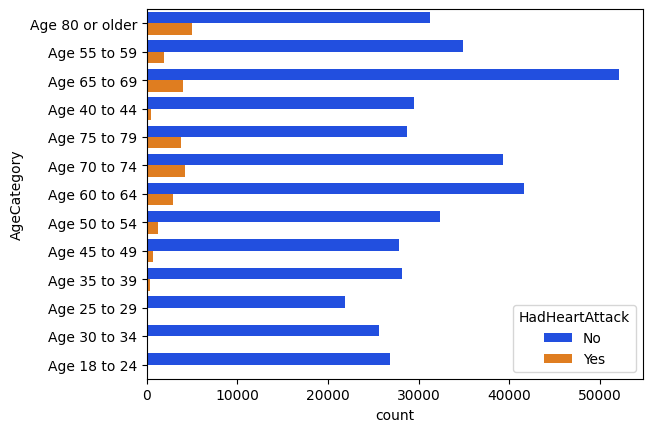

In [ ]:
sns.countplot(y=df.AgeCategory,hue=df.HadHeartAttack, palette='bright')


<Axes: xlabel='PhysicalActivities', ylabel='count'>

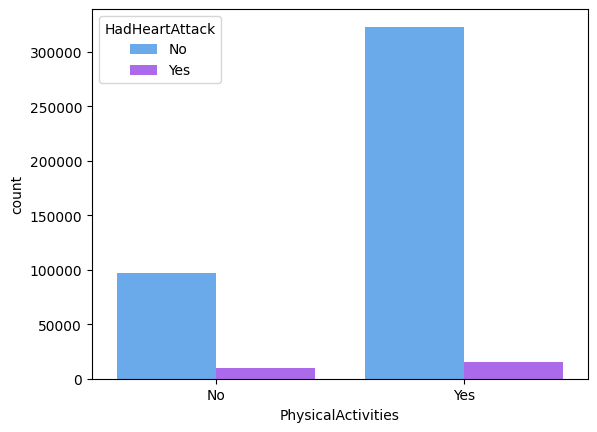

In [ ]:
sns.countplot(x=df.PhysicalActivities,palette='cool', hue=df.HadHeartAttack)
# more people were physically active and thus reduces the rate of Heart Attack

<Axes: xlabel='count', ylabel='SmokerStatus'>

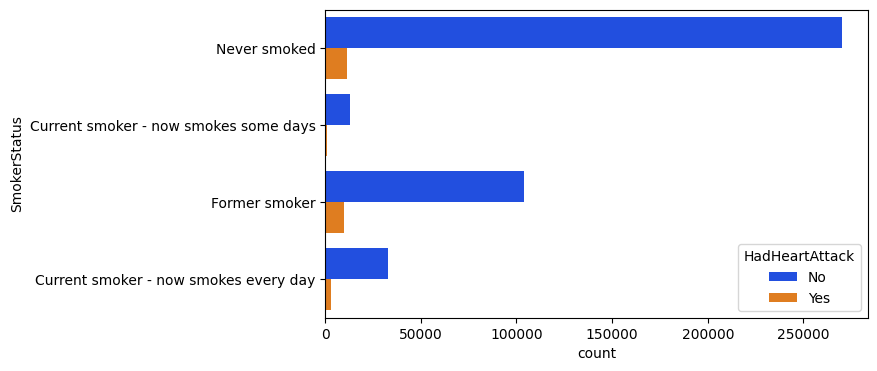

In [ ]:
plt.figure(figsize=(7,4))
sns.countplot(y=df.SmokerStatus, hue= df.HadHeartAttack,palette='bright')
# from the data it can be seen that people who never smoked or were former smokers have high rate of heart attacks

In [ ]:
age_group = df.groupby('AgeCategory')['HadHeartAttack'].value_counts()
#print(age_group.index.get_level_values(0))
age_group_yes = age_group[age_group.index.get_level_values(1) == 'Yes']
age_group_no = age_group[age_group.index.get_level_values(1) == 'No']
print(f'Highest Category sufferred more heart attacks: {age_group_yes.idxmax()[0]}')
print(f'Highest Category sufferred less heart attacks: {age_group_no.idxmax()[0]}')
# Which age group has the maximum number of Heart Attacks

Highest Category sufferred more heart attacks: Age 80 or older
Highest Category sufferred less heart attacks: Age 65 to 69


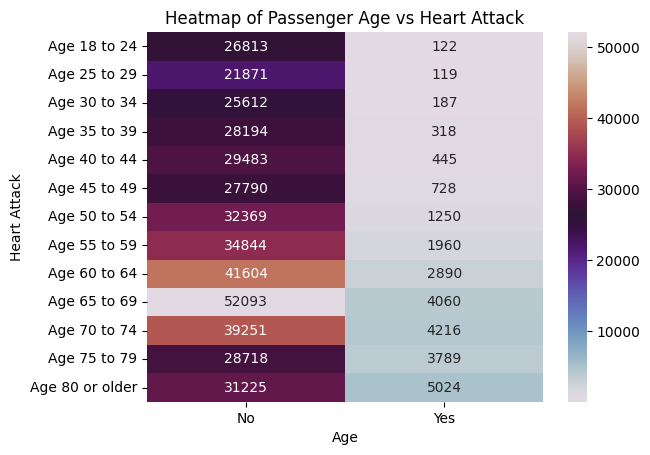

In [ ]:
ct=pd.crosstab(df.AgeCategory,df.HadHeartAttack)
sns.heatmap(ct,annot=True,fmt='d', cmap='twilight')
plt.title('Heatmap of Passenger Age vs Heart Attack')
plt.xlabel('Age')
plt.ylabel('Heart Attack')
plt.show()

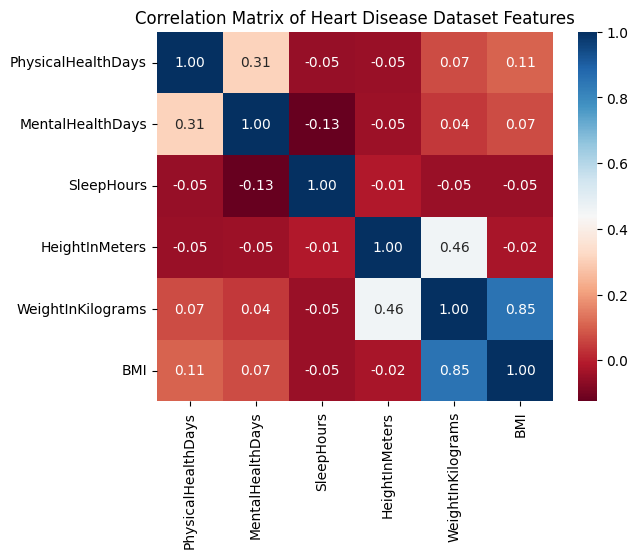

In [ ]:
numerical_features = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_features.corr()
# Generate a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='RdBu')

# Add titles and labels
plt.title('Correlation Matrix of Heart Disease Dataset Features')
plt.show()


### **Dropping irrelevant columns and making meaningful ones**

In [ ]:
df.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [ ]:
df['Health_days'] = df.MentalHealthDays + df.PhysicalHealthDays
df.insert(3, 'Health_days', df.pop('Health_days'))
df.head()

,State,Sex,GeneralHealth,Health_days,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,None of them,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,Never smoked,Not at all (right now),No,"White only, Non-Hispanic",Age 80 or older,1.70,80.74,27.44,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,0.0,Within past year (anytime less than 12 months ...,No,6.0,None of them,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,5.0,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,None of them,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 55 to 59,1.57,63.50,25.61,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Excellent,0.0,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,No,No,Yes,No,No,No,No,Yes,No,No,No,No,No,No,No,Current smoker - now smokes some days,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 65 to 69,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 40 to 44,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [ ]:
df.drop(['PhysicalHealthDays','State','RemovedTeeth','MentalHealthDays', 'LastCheckupTime',  'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking','DifficultyDressingBathing', 'DifficultyErrands', 'ECigaretteUsage',  'RaceEthnicityCategory','HeightInMeters', 'WeightInKilograms','TetanusLast10Tdap','HighRiskLastYear']
        ,axis=1,inplace=True)

df.columns

Index(['Sex', 'GeneralHealth', 'Health_days', 'PhysicalActivities',
       'SleepHours', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma',
       'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease',
       'HadArthritis', 'HadDiabetes', 'SmokerStatus', 'ChestScan',
       'AgeCategory', 'BMI', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12',
       'PneumoVaxEver', 'CovidPos'],
      dtype='object')

In [ ]:
df.head()

,Sex,GeneralHealth,Health_days,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,SmokerStatus,ChestScan,AgeCategory,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,CovidPos
0,Female,Very good,0.0,No,8.0,No,No,No,No,No,No,No,No,No,Yes,Never smoked,No,Age 80 or older,27.44,No,No,Yes,No,No
1,Female,Excellent,0.0,No,6.0,No,No,No,No,Yes,No,No,No,No,No,Never smoked,No,Age 80 or older,26.57,No,No,No,No,No
2,Female,Very good,5.0,Yes,5.0,No,No,No,No,Yes,No,No,No,No,No,Never smoked,No,Age 55 to 59,25.61,No,No,No,No,Yes
3,Female,Excellent,0.0,Yes,7.0,No,No,No,Yes,No,No,No,No,Yes,No,Current smoker - now smokes some days,Yes,Age 65 to 69,23.30,No,No,Yes,Yes,No
4,Female,Fair,2.0,Yes,9.0,No,No,No,No,No,No,No,No,No,No,Never smoked,Yes,Age 40 to 44,21.77,Yes,No,No,Yes,No


### **Instead of one hot encoding**, replace **No** with **0** and **Yes** with **1**

In [ ]:
columns_to_replace = ['HadAngina', 'HadStroke', 'HadAsthma','HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease','HadArthritis', 'HadDiabetes', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12',
       'PneumoVaxEver', 'CovidPos','PhysicalActivities','ChestScan']
df[columns_to_replace] = df[columns_to_replace].replace({'Yes': 1, 'No': 0})

df.head()

<ipython-input-141-36723f23cfe5>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[columns_to_replace] = df[columns_to_replace].replace({'Yes': 1, 'No': 0})


,Sex,GeneralHealth,Health_days,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,SmokerStatus,ChestScan,AgeCategory,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,CovidPos
0,Female,Very good,0.0,0,8.0,No,0,0,0,0,0,0,0,0,1,Never smoked,0,Age 80 or older,27.44,0,0,1,0,0
1,Female,Excellent,0.0,0,6.0,No,0,0,0,1,0,0,0,0,0,Never smoked,0,Age 80 or older,26.57,0,0,0,0,0
2,Female,Very good,5.0,1,5.0,No,0,0,0,1,0,0,0,0,0,Never smoked,0,Age 55 to 59,25.61,0,0,0,0,1
3,Female,Excellent,0.0,1,7.0,No,0,0,1,0,0,0,0,1,0,Current smoker - now smokes some days,1,Age 65 to 69,23.30,0,0,1,1,0
4,Female,Fair,2.0,1,9.0,No,0,0,0,0,0,0,0,0,0,Never smoked,1,Age 40 to 44,21.77,1,0,0,1,0


#### **One hot encoding for Nominal Gender Data**

In [ ]:
sex = pd.get_dummies(df['Sex'])
df = pd.concat([df,sex],axis=1)
df.drop(['Sex'],axis=1,inplace=True)
df = df.rename(columns={'female':'Female','male':'Male'})
df.head()

,GeneralHealth,Health_days,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,SmokerStatus,ChestScan,AgeCategory,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,CovidPos,Female,Male
0,Very good,0.0,0,8.0,No,0,0,0,0,0,0,0,0,1,Never smoked,0,Age 80 or older,27.44,0,0,1,0,0,True,False
1,Excellent,0.0,0,6.0,No,0,0,0,1,0,0,0,0,0,Never smoked,0,Age 80 or older,26.57,0,0,0,0,0,True,False
2,Very good,5.0,1,5.0,No,0,0,0,1,0,0,0,0,0,Never smoked,0,Age 55 to 59,25.61,0,0,0,0,1,True,False
3,Excellent,0.0,1,7.0,No,0,0,1,0,0,0,0,1,0,Current smoker - now smokes some days,1,Age 65 to 69,23.30,0,0,1,1,0,True,False
4,Fair,2.0,1,9.0,No,0,0,0,0,0,0,0,0,0,Never smoked,1,Age 40 to 44,21.77,1,0,0,1,0,True,False


In [ ]:
df.head()

,GeneralHealth,Health_days,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,SmokerStatus,ChestScan,AgeCategory,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,CovidPos,Female,Male
0,Very good,0.0,0,8.0,No,0,0,0,0,0,0,0,0,1,Never smoked,0,Age 80 or older,27.44,0,0,1,0,0,True,False
1,Excellent,0.0,0,6.0,No,0,0,0,1,0,0,0,0,0,Never smoked,0,Age 80 or older,26.57,0,0,0,0,0,True,False
2,Very good,5.0,1,5.0,No,0,0,0,1,0,0,0,0,0,Never smoked,0,Age 55 to 59,25.61,0,0,0,0,1,True,False
3,Excellent,0.0,1,7.0,No,0,0,1,0,0,0,0,1,0,Current smoker - now smokes some days,1,Age 65 to 69,23.30,0,0,1,1,0,True,False
4,Fair,2.0,1,9.0,No,0,0,0,0,0,0,0,0,0,Never smoked,1,Age 40 to 44,21.77,1,0,0,1,0,True,False


#### **Ordinal Encoding for General Health Column**

In [ ]:
order = ['Poor', 'Fair', 'Good', 'Very good', 'Excellent']

# Apply Ordinal Encoding
encoder = OrdinalEncoder(categories=[order])
df['GeneralHealthEncoded'] = encoder.fit_transform(df[['GeneralHealth']])

In [ ]:
df.drop('GeneralHealth',axis=1, inplace=True)
df.head()

,Health_days,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,SmokerStatus,ChestScan,AgeCategory,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,CovidPos,Female,Male,GeneralHealthEncoded
0,0.0,0,8.0,No,0,0,0,0,0,0,0,0,1,Never smoked,0,Age 80 or older,27.44,0,0,1,0,0,True,False,3.0
1,0.0,0,6.0,No,0,0,0,1,0,0,0,0,0,Never smoked,0,Age 80 or older,26.57,0,0,0,0,0,True,False,4.0
2,5.0,1,5.0,No,0,0,0,1,0,0,0,0,0,Never smoked,0,Age 55 to 59,25.61,0,0,0,0,1,True,False,3.0
3,0.0,1,7.0,No,0,0,1,0,0,0,0,1,0,Current smoker - now smokes some days,1,Age 65 to 69,23.30,0,0,1,1,0,True,False,4.0
4,2.0,1,9.0,No,0,0,0,0,0,0,0,0,0,Never smoked,1,Age 40 to 44,21.77,1,0,0,1,0,True,False,1.0


#### **One hot Encoding of Age Category Column**

In [ ]:
df = pd.concat([df, pd.get_dummies(df['AgeCategory'], prefix='AgeCategory')], axis=1)

In [ ]:
df.head()

,Health_days,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,SmokerStatus,ChestScan,AgeCategory,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,CovidPos,Female,Male,GeneralHealthEncoded,AgeCategory_Age 18 to 24,AgeCategory_Age 25 to 29,AgeCategory_Age 30 to 34,AgeCategory_Age 35 to 39,AgeCategory_Age 40 to 44,AgeCategory_Age 45 to 49,AgeCategory_Age 50 to 54,AgeCategory_Age 55 to 59,AgeCategory_Age 60 to 64,AgeCategory_Age 65 to 69,AgeCategory_Age 70 to 74,AgeCategory_Age 75 to 79,AgeCategory_Age 80 or older
0,0.0,0,8.0,No,0,0,0,0,0,0,0,0,1,Never smoked,0,Age 80 or older,27.44,0,0,1,0,0,True,False,3.0,False,False,False,False,False,False,False,False,False,False,False,False,True
1,0.0,0,6.0,No,0,0,0,1,0,0,0,0,0,Never smoked,0,Age 80 or older,26.57,0,0,0,0,0,True,False,4.0,False,False,False,False,False,False,False,False,False,False,False,False,True
2,5.0,1,5.0,No,0,0,0,1,0,0,0,0,0,Never smoked,0,Age 55 to 59,25.61,0,0,0,0,1,True,False,3.0,False,False,False,False,False,False,False,True,False,False,False,False,False
3,0.0,1,7.0,No,0,0,1,0,0,0,0,1,0,Current smoker - now smokes some days,1,Age 65 to 69,23.30,0,0,1,1,0,True,False,4.0,False,False,False,False,False,False,False,False,False,True,False,False,False
4,2.0,1,9.0,No,0,0,0,0,0,0,0,0,0,Never smoked,1,Age 40 to 44,21.77,1,0,0,1,0,True,False,1.0,False,False,False,False,True,False,False,False,False,False,False,False,False


### **Label Encoding of HadHeartAttack column**

In [ ]:
# initialize encoder
encoder = LabelEncoder()
# Apply label encoding to the 'HadHeartAttack' column
df['HadHeartAttack_encoded'] = encoder.fit_transform(df['HadHeartAttack'])

In [ ]:
df.drop('HadHeartAttack',axis=1,inplace=True)
df.head()

,Health_days,PhysicalActivities,SleepHours,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,SmokerStatus,ChestScan,AgeCategory,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,CovidPos,Female,Male,GeneralHealthEncoded,AgeCategory_Age 18 to 24,AgeCategory_Age 25 to 29,AgeCategory_Age 30 to 34,AgeCategory_Age 35 to 39,AgeCategory_Age 40 to 44,AgeCategory_Age 45 to 49,AgeCategory_Age 50 to 54,AgeCategory_Age 55 to 59,AgeCategory_Age 60 to 64,AgeCategory_Age 65 to 69,AgeCategory_Age 70 to 74,AgeCategory_Age 75 to 79,AgeCategory_Age 80 or older,HadHeartAttack_encoded
0,0.0,0,8.0,0,0,0,0,0,0,0,0,1,Never smoked,0,Age 80 or older,27.44,0,0,1,0,0,True,False,3.0,False,False,False,False,False,False,False,False,False,False,False,False,True,0
1,0.0,0,6.0,0,0,0,1,0,0,0,0,0,Never smoked,0,Age 80 or older,26.57,0,0,0,0,0,True,False,4.0,False,False,False,False,False,False,False,False,False,False,False,False,True,0
2,5.0,1,5.0,0,0,0,1,0,0,0,0,0,Never smoked,0,Age 55 to 59,25.61,0,0,0,0,1,True,False,3.0,False,False,False,False,False,False,False,True,False,False,False,False,False,0
3,0.0,1,7.0,0,0,1,0,0,0,0,1,0,Current smoker - now smokes some days,1,Age 65 to 69,23.30,0,0,1,1,0,True,False,4.0,False,False,False,False,False,False,False,False,False,True,False,False,False,0
4,2.0,1,9.0,0,0,0,0,0,0,0,0,0,Never smoked,1,Age 40 to 44,21.77,1,0,0,1,0,True,False,1.0,False,False,False,False,True,False,False,False,False,False,False,False,False,0


#***Lab 6 Tasks***

**Apply Feature Creation preprocessing step on the Titanic dataset to create a Family Size feature which calculates Family Size for each Passenger using following Equation. FamilySize = SibSp + Parch + 1**

In [ ]:
titanic = pd.read_csv("/content/titanic.csv")

In [ ]:
titanic["FamilySize"] = titanic.SibSp + titanic.Parch + 1
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [ ]:
titanic.drop(['SibSp', 'Parch','Cabin','Ticket'],axis=1, inplace=True) #Cabin is dropped cause too many missing values
titanic1=titanic.copy()

In [ ]:
titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
Fare,0
Embarked,2
FamilySize,0


In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,1


###**Apply ColumnTransformer, FunctionTransformer and Sklearn Pipeline on the Titanic dataset**

In [ ]:
preprocessor = ColumnTransformer(transformers=[
    ('age_imputer', SimpleImputer(strategy='mean'), ['Age']),
    ('embarked_imputer', SimpleImputer(strategy='most_frequent'), ['Embarked']),
    ('ohe', OneHotEncoder(), ['Sex','Embarked'])
], remainder='passthrough')  # Pass through other columns like 'Fare', 'Name','FamilySize','PassengerID'

transformed_data = preprocessor.fit_transform(titanic)
# saving the transformed data in titanic object
titanic=  pd.DataFrame(transformed_data, columns = preprocessor.get_feature_names_out())
titanic.head()

,age_imputer__Age,embarked_imputer__Embarked,ohe__Sex_female,ohe__Sex_male,ohe__Embarked_C,ohe__Embarked_Q,ohe__Embarked_S,ohe__Embarked_nan,remainder__PassengerId,remainder__Survived,remainder__Pclass,remainder__Name,remainder__Fare,remainder__FamilySize
0,22.0,S,0.0,1.0,0.0,0.0,1.0,0.0,1,0,3,"Braund, Mr. Owen Harris",7.25,2
1,38.0,C,1.0,0.0,1.0,0.0,0.0,0.0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",71.2833,2
2,26.0,S,1.0,0.0,0.0,0.0,1.0,0.0,3,1,3,"Heikkinen, Miss. Laina",7.925,1
3,35.0,S,1.0,0.0,0.0,0.0,1.0,0.0,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",53.1,2
4,35.0,S,0.0,1.0,0.0,0.0,1.0,0.0,5,0,3,"Allen, Mr. William Henry",8.05,1


In [ ]:
titanic = titanic.rename(
    columns={
        'age_imputer__Age': "Age_imputed",
        'embarked_imputer__Embarked': "Embarked_imputed",
        'ohe__Sex_female': "Female",
        'ohe__Sex_male': "Male",
        'ohe__Embarked_C': "Embarked_C",
        'ohe__Embarked_Q': "Embarked_Q",
        'ohe__Embarked_S': "Embarked_S",
        'ohe__Embarked_nan': "Embarked_Nan",
        'remainder__PassengerI': "PassID",
        'remainder__Survived': "Suvived",
        'remainder__Pclass': "PClass",
        'remainder__Name': "Name",
        'remainder__Fare': "Fare",
        'remainder__FamilySize': "FamilySize"
    }
)
titanic.head(3)

,Age_imputed,Embarked_imputed,Female,Male,Embarked_C,Embarked_Q,Embarked_S,Embarked_Nan,remainder__PassengerId,Suvived,PClass,Name,Fare,FamilySize
0,22.0,S,0.0,1.0,0.0,0.0,1.0,0.0,1,0,3,"Braund, Mr. Owen Harris",7.25,2
1,38.0,C,1.0,0.0,1.0,0.0,0.0,0.0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",71.2833,2
2,26.0,S,1.0,0.0,0.0,0.0,1.0,0.0,3,1,3,"Heikkinen, Miss. Laina",7.925,1


###**Function Transformer and Pipeline**

In [ ]:
def impute_embarked(X):
    X['Embarked'] = X['Embarked'].fillna(X['Embarked'].mode()[0])  # Fill missing values
    return X

preprocessor = ColumnTransformer(transformers=[
    ('age_imputer', SimpleImputer(strategy='mean'), ['Age']),
    ('embarked_encoder', Pipeline(steps=[
        ('imputer', FunctionTransformer(impute_embarked)),  # Impute Embarked first
        ('onehot', OneHotEncoder())  # Then apply OneHotEncoder
    ]), ['Embarked']),
    ('ohe', OneHotEncoder(), ['Sex'])
], remainder='passthrough')

transformed_data1 = preprocessor.fit_transform(titanic1)
# saving the transformed data in titanic1 object
titanic1=  pd.DataFrame(transformed_data)
titanic1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,22.0,S,0.0,1.0,0.0,0.0,1.0,0.0,1,0,3,"Braund, Mr. Owen Harris",7.25,2
1,38.0,C,1.0,0.0,1.0,0.0,0.0,0.0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",71.2833,2
2,26.0,S,1.0,0.0,0.0,0.0,1.0,0.0,3,1,3,"Heikkinen, Miss. Laina",7.925,1
3,35.0,S,1.0,0.0,0.0,0.0,1.0,0.0,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",53.1,2
4,35.0,S,0.0,1.0,0.0,0.0,1.0,0.0,5,0,3,"Allen, Mr. William Henry",8.05,1


###**Applying ColumnTransformer, FunctionTransformer and Sklearn Pipeline on the Heart Disease dataset**

In [ ]:
data = pd.read_csv("/content/heart_2022_with_nans.csv")


In [ ]:

data['Health_days'] = data.MentalHealthDays + data.PhysicalHealthDays
data.drop_duplicates(subset=None, keep='first', inplace=True)
data.drop(['PhysicalHealthDays','State','RemovedTeeth','MentalHealthDays', 'LastCheckupTime',  'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking','DifficultyDressingBathing', 'DifficultyErrands', 'ECigaretteUsage',  'RaceEthnicityCategory','HeightInMeters', 'WeightInKilograms','TetanusLast10Tdap','HighRiskLastYear']
        ,axis=1,inplace=True)
numerical_features = data.select_dtypes(include=['number']).columns
categorical_features=data.select_dtypes(include=['object']).columns


In [ ]:
data1 = data.copy()
data.head()

,Sex,GeneralHealth,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,...,SmokerStatus,ChestScan,AgeCategory,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,CovidPos,Health_days
0,Female,Very good,No,8.0,No,No,No,No,No,No,...,Never smoked,No,Age 80 or older,NaN,No,No,Yes,No,No,0.0
1,Female,Excellent,No,6.0,No,No,No,No,Yes,No,...,Never smoked,No,Age 80 or older,26.57,No,No,No,No,No,0.0
2,Female,Very good,Yes,5.0,No,No,No,No,Yes,No,...,Never smoked,No,Age 55 to 59,25.61,No,No,No,No,Yes,5.0
3,Female,Excellent,Yes,7.0,No,No,No,Yes,No,No,...,Current smoker - now smokes some days,Yes,NaN,23.30,No,No,Yes,Yes,No,0.0
4,Female,Fair,Yes,9.0,No,No,No,No,No,No,...,Never smoked,Yes,Age 40 to 44,21.77,Yes,No,No,Yes,No,2.0


## **Column Transformer to Heart Disease Data**

In [ ]:
numerical_transformer = SimpleImputer(strategy='median')  # Impute missing values with median
categorical_transformer = SimpleImputer(strategy='most_frequent')  # Impute missing values with most frequent value

# Use ColumnTransformer to apply different preprocessing steps for numerical and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),  # Apply median imputation to numerical features
        ('cat', categorical_transformer, categorical_features),  # Apply mode imputation to categorical features
        ('ohe', OneHotEncoder(), ['Sex']) ])

# Fit and transform the heart disease using the ColumnTransformer
data = preprocessor.fit_transform(data)
data = pd.DataFrame(data, columns=preprocessor.get_feature_names_out())

In [ ]:
data.head()

,num__SleepHours,num__BMI,num__Health_days,cat__Sex,cat__GeneralHealth,cat__PhysicalActivities,cat__HadHeartAttack,cat__HadAngina,cat__HadStroke,cat__HadAsthma,...,cat__SmokerStatus,cat__ChestScan,cat__AgeCategory,cat__AlcoholDrinkers,cat__HIVTesting,cat__FluVaxLast12,cat__PneumoVaxEver,cat__CovidPos,ohe__Sex_Female,ohe__Sex_Male
0,8.0,27.44,0.0,Female,Very good,No,No,No,No,No,...,Never smoked,No,Age 80 or older,No,No,Yes,No,No,1.0,0.0
1,6.0,26.57,0.0,Female,Excellent,No,No,No,No,No,...,Never smoked,No,Age 80 or older,No,No,No,No,No,1.0,0.0
2,5.0,25.61,5.0,Female,Very good,Yes,No,No,No,No,...,Never smoked,No,Age 55 to 59,No,No,No,No,Yes,1.0,0.0
3,7.0,23.3,0.0,Female,Excellent,Yes,No,No,No,Yes,...,Current smoker - now smokes some days,Yes,Age 65 to 69,No,No,Yes,Yes,No,1.0,0.0
4,9.0,21.77,2.0,Female,Fair,Yes,No,No,No,No,...,Never smoked,Yes,Age 40 to 44,Yes,No,No,Yes,No,1.0,0.0


In [ ]:
data.shape #originally were 40 columns

(444975, 26)

## **Function Transformer and Pipelining to Heart Disease Data**

In [ ]:
#data 1 columns:
data1.select_dtypes(include=['number']).columns

Index(['SleepHours', 'BMI', 'Health_days'], dtype='object')

In [ ]:
categorical_transformer1 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())
])
numerical_transformer = SimpleImputer(strategy='median')
num =  data1.select_dtypes(include=['number']).columns

preprocessor = ColumnTransformer(
    transformers=[
         ('num', numerical_transformer, num),
        ('cat', categorical_transformer, categorical_features)
    ]
)
data1 = preprocessor.fit_transform(data1)
data1 = pd.DataFrame(data1, columns=preprocessor.get_feature_names_out())


In [ ]:
data1.head()

,num__SleepHours,num__BMI,num__Health_days,cat__Sex,cat__GeneralHealth,cat__PhysicalActivities,cat__HadHeartAttack,cat__HadAngina,cat__HadStroke,cat__HadAsthma,...,cat__HadArthritis,cat__HadDiabetes,cat__SmokerStatus,cat__ChestScan,cat__AgeCategory,cat__AlcoholDrinkers,cat__HIVTesting,cat__FluVaxLast12,cat__PneumoVaxEver,cat__CovidPos
0,8.0,27.44,0.0,Female,Very good,No,No,No,No,No,...,No,Yes,Never smoked,No,Age 80 or older,No,No,Yes,No,No
1,6.0,26.57,0.0,Female,Excellent,No,No,No,No,No,...,No,No,Never smoked,No,Age 80 or older,No,No,No,No,No
2,5.0,25.61,5.0,Female,Very good,Yes,No,No,No,No,...,No,No,Never smoked,No,Age 55 to 59,No,No,No,No,Yes
3,7.0,23.3,0.0,Female,Excellent,Yes,No,No,No,Yes,...,Yes,No,Current smoker - now smokes some days,Yes,Age 65 to 69,No,No,Yes,Yes,No
4,9.0,21.77,2.0,Female,Fair,Yes,No,No,No,No,...,No,No,Never smoked,Yes,Age 40 to 44,Yes,No,No,Yes,No
